https://coronavirus.data.gov.uk/cases

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date

## New cases 

(737638.0, 737730.0)

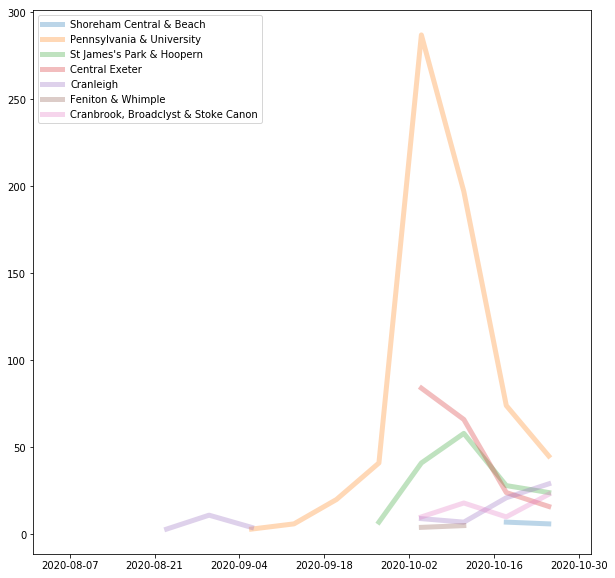

In [229]:
df = pd.read_csv('https://coronavirus.data.gov.uk/downloads/msoa_data/MSOAs_latest.csv')
df = df.replace(-99, np.nan)

# areas = ['Waverley','Exeter','Adur','East Devon','Plymouth','Guildford']

local_areas = ['Shoreham Central & Beach','Pennsylvania & University',"St James's Park & Hoopern",'Central Exeter','Cranleigh','Feniton & Whimple','Cranbrook, Broadclyst & Stoke Canon']
# df_tmp = df.loc[df['msoa11_hclnm'] == 'Pennsylvania & University']
# df_tmp.iloc[0,8:-1]
# # df_tmp.loc[0,8:10]

plt.figure(figsize=(10, 10))

# for area in areas:
#     df_tmp = df.loc[df['lad19_nm'] == area]
#     df_area = df_tmp.iloc[:,8:-1].sum(axis=0)
#     dates = [datetime.datetime.strptime("2020"+d + '-1', "%Ywk_%W-%w") for d in df_area.index]
#     plt.plot(dates,df_area,lw=5.0,alpha=0.3,label = area)
    
# for local_area in local_areas:
#     df_tmp = df.loc[df['msoa11_hclnm'] == local_area]
#     df_area = df_tmp.iloc[:,8:-1].sum(axis=0)
#     dates = [datetime.datetime.strptime("2020"+d + '-1', "%Ywk_%W-%w") for d in df_area.index]
#     plt.plot(dates,df_area,label = local_area)

for area in local_areas:
    df_tmp = df.loc[df['areaName'] == area]
#     df_area = df_tmp.iloc[:,8:-1].sum(axis=0)
    df_area = df_tmp['newCasesBySpecimenDateRollingSum']
#     dates = [datetime.datetime.strptime("2020"+d + '-1', "%Ywk_%W-%w") for d in df['date']]
    dates =  df_tmp['date']
    plt.plot(pd.to_datetime(dates),df_area.values,lw=5.0,alpha=0.3,label = area)

plt.legend()
plt.xlim([datetime.datetime(2020, 8, 1, 0, 0),datetime.datetime(2020, 11, 1, 0, 0)])



## Hospital admissions


https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-hospital-activity/

In [224]:
# df2 = pd.read_excel('https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201015-1.xlsx',sheet_name='Hosp ads & diag',header=14)


today = date.today()
day = today.day
month = today.month
month_tmp = month
day_tmp = day

date_found = False
#loops just to get the most recent filename that exists
for i in range(10):
    for j in range(32):
        filename = 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/'+str(month_tmp)+'/Weekly-covid-admissions-publication-20'+str(month_tmp)+str(day_tmp)+'.xlsx'
#                    'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201022.xlsx'
        try:
            df2 = pd.read_excel(filename,sheet_name='Hosp ads & diag',header=14)
            date_found = True
            break
        except:
            pass
        day_tmp -= 1
    if date_found:
        break
    month_tmp -= 1
    # df2 = pd.read_excel('https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201015-1.xlsx',sheet_name='Hosp ads & diag',header=14)
    

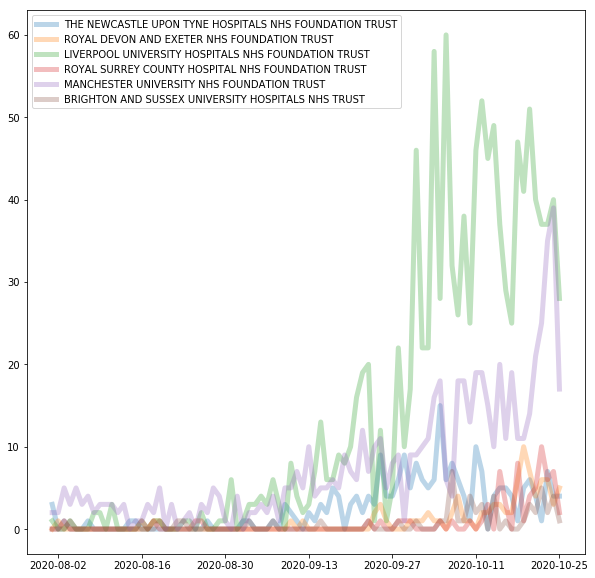

In [225]:
hospitals = ['THE NEWCASTLE UPON TYNE HOSPITALS NHS FOUNDATION TRUST','ROYAL DEVON AND EXETER NHS FOUNDATION TRUST','LIVERPOOL UNIVERSITY HOSPITALS NHS FOUNDATION TRUST','ROYAL SURREY COUNTY HOSPITAL NHS FOUNDATION TRUST','MANCHESTER UNIVERSITY NHS FOUNDATION TRUST','BRIGHTON AND SUSSEX UNIVERSITY HOSPITALS NHS TRUST']

plt.figure(figsize=(10, 10))

for hospital in hospitals:
    df_tmp = df2.loc[df2['Name'] == hospital]
    df_hospital = df_tmp.iloc[:,3::]
    plt.plot(df_hospital.transpose(),lw=5.0,alpha=0.3,label = hospital)
    
plt.legend()

## No. beds containing confirmed COVID patients

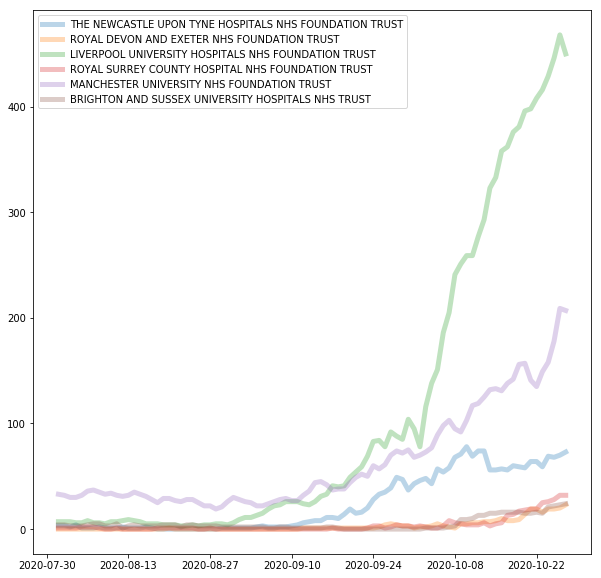

In [226]:

df3 = pd.read_excel(filename,sheet_name='All beds COVID',header=14)

plt.figure(figsize=(10, 10))

for hospital in hospitals:
    df_tmp = df3.loc[df3['Name'] == hospital]
    df_hospital = df_tmp.iloc[:,3::]
    plt.plot(df_hospital.transpose(),lw=5.0,alpha=0.3,label = hospital)
    
plt.legend()

## No. ventilator beds containing confirmed COVID patients

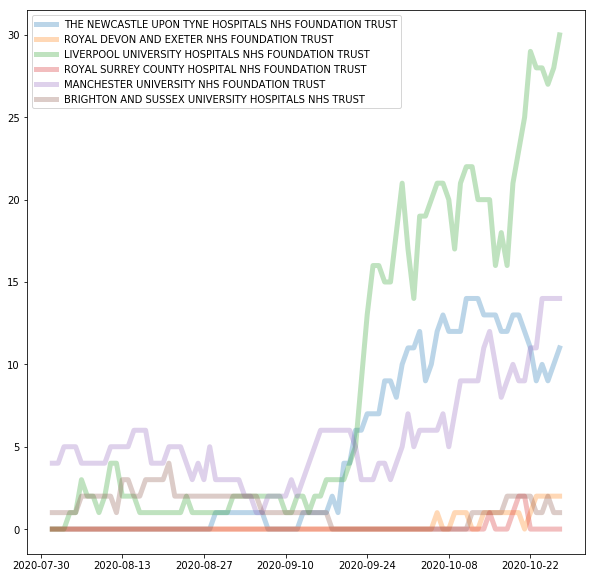

In [227]:

df4 = pd.read_excel(filename,sheet_name='MV beds COVID',header=14)

plt.figure(figsize=(10, 10))

for hospital in hospitals:
    df_tmp = df4.loc[df4['Name'] == hospital]
    df_hospital = df_tmp.iloc[:,3::]
    plt.plot(df_hospital.transpose(),lw=5.0,alpha=0.3,label = hospital)
    
plt.legend()